In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tifffile import TiffFile, imread, TiffWriter
from lxml import etree
import json

# Basics of Numpy and TIFF File Management

`numpy` is one of the libraries used by CaImAn to handle images and movies in form of numerical arrays. `tifffile` library is useful to handle a popular data format used to store calcium imaging data. In this notebook, we learn basics of `numpy` and `tifffile`.

**Learning Outcomes**

1. Fundamentals of handling images as `numpy` arrays
2. Data and metadata handling with `tifffile`


## How can we store image data as a `numpy` array?

**Learning Outcomes**
1. Creating single and multiple frames of data
2. Plotting the frames


Explore: 
1. vmin, vmax, dtype, 
2. different types of colormaps and their use cases
3. Plot an image in gray scale, change to another colormap, then see if your interpretation changes


y = np.linspace(0, 10, 1000)
y = np.cos(x)

frame = np.vstack([y]*1000)
plt.imshow(frame, cmap='gray')
plt.imshow(frame, cmap='jet')
plt.imshow(frame, cmap='viridis')


**Example** Create a 3x3 frame where the middle pixel has value of 1 and the rest have 0

In [ ]:
frame = np.array(
    [
        [0, 0, 0],
        [0, 1, 0],
        [0, 0 ,0]
    ]
)
plt.imshow(frame, cmap='gray');

Create a 3x3 frame where the top left corner has value of 1 and the rest are 0

In [ ]:
frame = np.array(
    [
        [1, 0, 0],
        [0, 0, 0],
        [0, 0 ,0]
    ]
)
plt.imshow(frame, cmap='gray');

Create a 3x3 frame where all the corners has value of 1, center pixel has a value of 0.5, and the rest are 0

In [ ]:
frame = np.array(
    [
        [1, 0, 1],
        [0, 0.5, 0],
        [1, 0 ,1]
    ]
)
plt.imshow(frame, cmap='gray');

Create a 3x3 frame where the pixels have any value you want them to be!

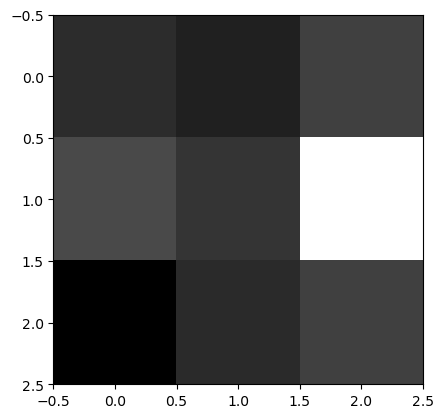

In [2]:
frame = np.array(
    [
        [0.1, -0.5, 1],
        [1.5, 0.5, 10],
        [-2.0, 0 ,1]
    ]
)
plt.imshow(frame, cmap='gray');

In [4]:
# plt.imsave('example_img.png', frame)

**Example** Create 2 frames where the first frame has value of 1 in central pixel and the second frame has all pixels as 0. What does the shape of the movie generated from the two frames indicate?

In [ ]:
frame1 = np.array(
    [
        [0, 0, 0],
        [0, 1, 0],
        [0, 0 ,0]
    ]
)

frame2 = np.array(
    [
        [0, 0, 0],
        [0, 0, 0],
        [0, 0 ,0]
    ]
)

movie = np.array(
    [
        frame1,
        frame2
    ]
)

movie.shape

Create 2 frames each 2x2 where the 

1. first frame has value of 1 in top left pixel
2. second frame has a value of -1 in top left pixel

Can you predict the shape of this movie?

In [ ]:
frame1 = np.array(
    [
        [1, 0],
        [0, 0],
    ]
)

frame2 = np.array(
    [
        [0, 0],
        [0, -1],
    ]
)

movie = np.array(
    [
        frame1,
        frame2
    ]
)

movie.shape

Let's do one more before we move on to the next topic! 
Create a sequence of four 3x2 frames where:

1. The first frame is entirely zeros.
2. The second frame has a value of 1 in the top-left corner.
3. The third frame retains the value of 1 in the top-left corner and adds a value of 1 in the center.
4. The fourth frame keeps the previous values unchanged.

In [ ]:
frame_1 = [
        [0, 0],
        [0, 0],
        [0, 0]
        ]

frame_2 = [
        [1, 0],
        [0, 0],
        [0, 0]
        ]

frame_3 = [
        [1, 0],
        [0, 1],
        [0, 0]
        ]

frame_4 = [
        [1, 0],
        [0, 1],
        [0, 0]
        ]

movie = np.array(
    [frame_1,
    frame_2,
    frame_3,
    frame_4]
)

movie.shape

## TIFF File 

**Learning Outcomes**
Reading and writing TIFF File

**Example** Read `data_endoscope.tif`. How many frames does it have?

In [ ]:
frames = imread('../data/data_endoscope.tif')
frames.shape

Read `Sue_2x_3000_40_-46.tif`. How many frames does this data have?

In [ ]:
frames = imread('../data/Sue_2x_3000_40_-46.tif')
frames.shape

Read `Sue_2x_3000_40_-46.tif`. How long does it take?

Hint: Put `%%timeit` in the beginning of the cell

In [ ]:
%%timeit
frames = imread('../data/Sue_2x_3000_40_-46.tif')

**Example** Read only the first 3 frames from `Sue_2x_3000_40_-46.tif`

In [ ]:
frames = imread('../data/Sue_2x_3000_40_-46.tif', key=(0, 1, 2))
frames.shape

Read only 1, 3, 5, 7, 9th frame from `Sue_2x_3000_40_-46.tif`

In [ ]:
frames = imread('../data/Sue_2x_3000_40_-46.tif', key=(0, 2, 4, 6, 8))
frames.shape

Read only first 100 frames from `Sue_2x_3000_40_-46.tif`

Hint: use range(0, 100)

In [ ]:
frames = imread('../data/Sue_2x_3000_40_-46.tif', key=range(0, 100))
frames.shape

**Example** Read `data_endoscope.tif` with `TiffFile`?

In [ ]:
f = TiffFile('../data/data_endoscope.tif')
frames = np.array([page.asarray() for page in f.pages])

Read `Sue_2x_3000_40_-46.tif` with TiffFile

In [ ]:
f = TiffFile('../data/Sue_2x_3000_40_-46.tif')
frames = np.array([page.asarray() for page in f.pages])

How long does it take to read `Sue_2x_3000_40_-46.tif` with TiffFile?

In [ ]:
%%timeit
f = TiffFile('../data/Sue_2x_3000_40_-46.tif')
frames = np.array([page.asarray() for page in f.pages])

Comparing time taken to read and access tiff file data using `imread` and `TiffFile`

In [ ]:
%%timeit
tiff_full = imread('../data/data_endoscope.tif')
tiff_full[-1]

In [ ]:
%%timeit
f = TiffFile("../data/data_endoscope.tif") 
f.pages[-1].asarray()

## TIFF File Metadata Handling

**Learning Outcomes**
Reading and writing metadata into a TIFF File

**Example** Read metadata from the first frame of `data_endoscope.tif`

In [ ]:
f = TiffFile('../data/data_endoscope.tif')
tags = f.pages[0].tags
for tag in tags:
    print(f'{tag.name}: {tag.value}')

Read metadata from the 50th frame of `data_endoscope.tif`. Is it the same as the first frame?

In [ ]:
f = TiffFile('../data/data_endoscope.tif')
tags = f.pages[49].tags
for tag in tags:
    print(f'{tag.name}: {tag.value}')

Read metadata from the last frame of `data_endoscope.tif`. Is it the same as the first frame?

In [ ]:
f = TiffFile('../data/data_endoscope.tif')
tags = f.pages[-1].tags
for tag in tags:
    print(f'{tag.name}: {tag.value}')

**Example** Add `frame_rate` = 10 to `data_endoscope.tif` all frames and write a new TIFF File

In [ ]:
f = TiffFile('../data/data_endoscope.tif')
description = {
    'frame_rate': 10
}

new_description = json.dumps(description)

with TiffWriter('../data/modified_tiff_file.tif') as out_tif:
    for frame in frames:
        out_tif.save(frame, description=new_description, metadata=None)

In [ ]:
with TiffFile('../data/modified_tiff_file.tif') as tif:
    page = tif.pages[0]
    for tag in page.tags:
        print(f"{tag.name}: {tag.value}")

Add `decay_time` = 0.1 to `data_endoscope.tif` all frames and write a new TIFF File

In [ ]:
f = TiffFile('../data/data_endoscope.tif')
description = {
    'decay_time': 0.1
}

new_description = json.dumps(description)

with TiffWriter('../data/modified_tiff_file_1.tif') as out_tif:
    for frame in frames:
        out_tif.save(frame, description=new_description, metadata=None)

Add `decay_time` = 0.1 and `frame_rate`=10 to `data_endoscope.tif` all frames and write a new TIFF File

In [ ]:
f = TiffFile('../data/data_endoscope.tif')
description = {
    'decay_time': 0.1,
    'frame_rate': 10
}

new_description = json.dumps(description)

with TiffWriter('../data/modified_tiff_file_1.tif') as out_tif:
    for frame in frames:
        out_tif.save(frame, description=new_description, metadata=None)

## OME Data

**Learning Outcomes**
Opening and accessing OME metadata

**Example** Read multifile-Z2.ome.tiff metadata

In [ ]:
ome_file = "../data/multifile-Z2.ome.tiff"
f = TiffFile(ome_file)
metadata = tif.ome_metadata
metadata

Read multifile-Z3.ome.tiff metadata

In [ ]:
ome_file = "../data/multifile-Z3.ome.tiff"
f = TiffFile(ome_file)
metadata = tif.ome_metadata
metadata

**Example** Read multifile-Z3.ome.tiff metadata and write it to a file. 

In [ ]:
ome_file = "../data/multifile-Z3.ome.tiff"
f = TiffFile(ome_file)
metadata = tif.ome_metadata

f_write = open('metadata.xml', 'w')
f_write.write(metadata);

Read multifile-Z1.ome.tiff metadata and write it to a file. Open the file and see how it looks like

In [ ]:
ome_file = "../data/multifile-Z1.ome.tiff"
f = TiffFile(ome_file)
metadata = tif.ome_metadata

f_write = open('metadata.xml', 'w')
f_write.write(metadata);

Read multifile-Z1.ome.tiff metadata, make it look pretty, and write it to a file

Hint:
Use
```python
dom = xml.dom.minidom.parseString(metadata)
pretty_xml_str_ib = dom.toprettyxml()
```

and write that to a file named `pretty_metadata.xml`

In [ ]:
ome_file = "../data/multifile-Z1.ome.tiff"
f = TiffFile(ome_file)
metadata = tif.ome_metadata

xml_root = etree.fromstring(metadata.encode('utf-8'))
pretty_xml_str = etree.tostring(xml_root, pretty_print=True, encoding='unicode')
pretty_xml_str

f_write = open('pretty_metadata7.xml', 'w')
f_write.write(pretty_xml_str);